In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read the data

copper_data = pd.read_csv("Copper_Set.csv")
copper_data.head()

/var/folders/t9/vdv2k9890dd_ff2_c6knb2l40000gp/T/ipykernel_689/1474769303.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  copper_data = pd.read_csv("Copper_Set.csv")


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
# shape of data
copper_data.shape

(181673, 14)

In [5]:
# checking duplicates
copper_data.duplicated().sum()

0

In [6]:
# column name renaming

copper_data = copper_data.rename (columns={
    'quantity tons': 'quantity_tons',
    'item type' : 'item_type',
    'delivery date': 'delivery_date'
    })
copper_data.head(1)

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0


# Dealing with data in wrong format
#### Except categorical column

In [7]:
copper_data['item_date'] = pd.to_datetime(copper_data['item_date'],
                                        format= '%Y%m%d' , errors='coerce').dt.date

copper_data['quantity_tons'] = pd.to_numeric(copper_data['quantity_tons'], errors='coerce').round(2)

copper_data['customer'] = pd.to_numeric(copper_data['customer'], errors='coerce')

copper_data['country'] = pd.to_numeric(copper_data['country'], errors='coerce')

copper_data['application'] = pd.to_numeric(copper_data['application'], errors='coerce')

copper_data['thickness'] = pd.to_numeric(copper_data['thickness'], errors='coerce')

copper_data['width'] = pd.to_numeric(copper_data['width'], errors='coerce')

copper_data['material_ref'] = copper_data['material_ref'].str.lstrip('0')

copper_data['product_ref'] = pd.to_numeric(copper_data['product_ref'], errors='coerce')

copper_data['delivery_date'] = pd.to_datetime(copper_data['delivery_date'], format='%Y%m%d', errors='coerce').dt.date

copper_data['selling_price'] = pd.to_numeric(copper_data['selling_price'], errors='coerce')

# Dealing with null values

In [8]:
# null values
copper_data.isnull().sum()

id                   2
item_date            3
quantity_tons        1
customer             1
country             28
status               2
item_type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery_date        3
selling_price        1
dtype: int64

In [9]:
copper_data['material_ref'].head(30)

# can see NaN within 30 rows

0                 DEQ1 S460MC
1                      104991
2                    S0380700
3     DX51D+ZM310MAO 2.3X1317
4             2_S275JR+AR-CL1
5                      102325
6           NBW_L+_A_1125_0.4
7                     1000944
8                      106786
9                      102325
10            NBW_L+_1125_0.4
11                    1000063
12                        NaN
13                     DC04EK
14                        NaN
15                    1002867
16              PEA1265X595SP
17      684Z WHITE ETEX B7032
18                        NaN
19                    1000113
20              GRE1265X595SP
21                     105003
22                        NaN
23                    1000063
24              BAS1265X595SP
25                     102048
26                        NaN
27          1040912.O.TR.NPAC
28              GOO1208X595SP
29                     102062
Name: material_ref, dtype: object

In [10]:
# material_ref has large amnt of null values, so replacing them with unknown

copper_data['material_ref'].fillna('unknown',inplace=True)
copper_data['material_ref'].head(30)

/var/folders/t9/vdv2k9890dd_ff2_c6knb2l40000gp/T/ipykernel_689/1629255678.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copper_data['material_ref'].fillna('unknown',inplace=True)


0                 DEQ1 S460MC
1                      104991
2                    S0380700
3     DX51D+ZM310MAO 2.3X1317
4             2_S275JR+AR-CL1
5                      102325
6           NBW_L+_A_1125_0.4
7                     1000944
8                      106786
9                      102325
10            NBW_L+_1125_0.4
11                    1000063
12                    unknown
13                     DC04EK
14                    unknown
15                    1002867
16              PEA1265X595SP
17      684Z WHITE ETEX B7032
18                    unknown
19                    1000113
20              GRE1265X595SP
21                     105003
22                    unknown
23                    1000063
24              BAS1265X595SP
25                     102048
26                    unknown
27          1040912.O.TR.NPAC
28              GOO1208X595SP
29                     102062
Name: material_ref, dtype: object

In [11]:
# remaining clmn has less amnt of null values , so drop it

copper_data.dropna(inplace=True)

In [12]:
copper_data.isnull().sum()

id               0
item_date        0
quantity_tons    0
customer         0
country          0
status           0
item_type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery_date    0
selling_price    0
dtype: int64

# Treat Outliers

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'quantity_tons'),
  Text(1, 0, 'customer'),
  Text(2, 0, 'country'),
  Text(3, 0, 'application'),
  Text(4, 0, 'thickness'),
  Text(5, 0, 'width'),
  Text(6, 0, 'product_ref'),
  Text(7, 0, 'selling_price')])

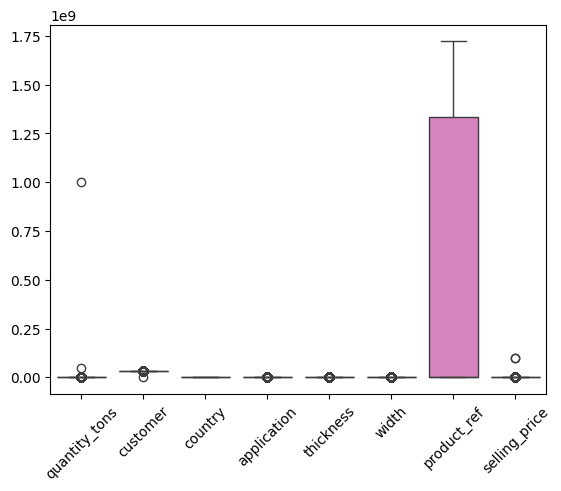

In [13]:
# Box plot

sns.boxplot(data = copper_data)
plt.xticks(rotation=45)

In [14]:
d_cm = copper_data.copy()

In [15]:
# initalizing variable for particular clmns

dist_plot_clmn = ['quantity_tons','country','thickness','width','selling_price']

/var/folders/t9/vdv2k9890dd_ff2_c6knb2l40000gp/T/ipykernel_689/3058029955.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d_cm[col])


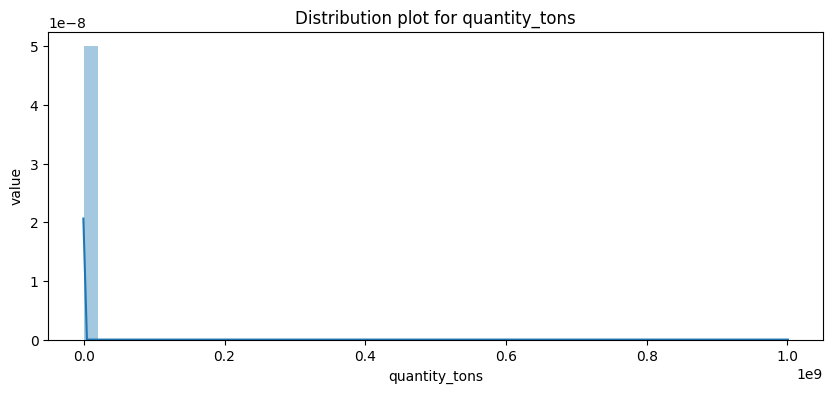

/var/folders/t9/vdv2k9890dd_ff2_c6knb2l40000gp/T/ipykernel_689/3058029955.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d_cm[col])


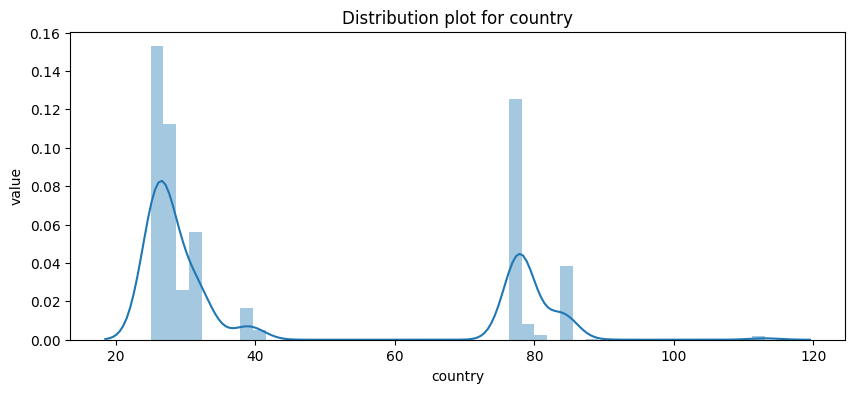

/var/folders/t9/vdv2k9890dd_ff2_c6knb2l40000gp/T/ipykernel_689/3058029955.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d_cm[col])


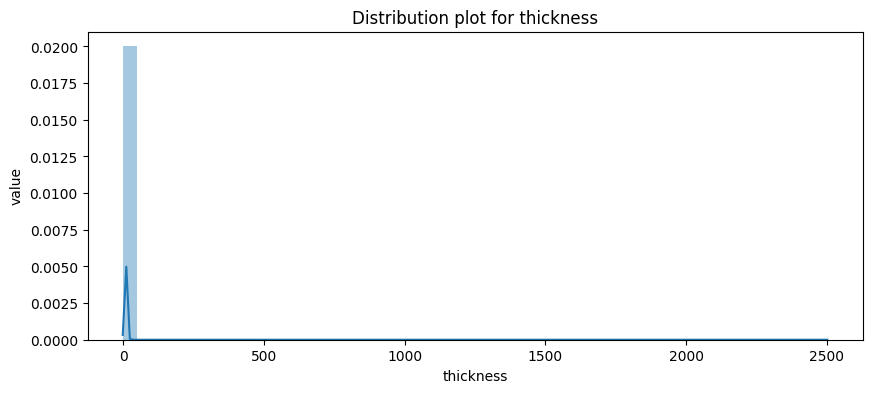

/var/folders/t9/vdv2k9890dd_ff2_c6knb2l40000gp/T/ipykernel_689/3058029955.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d_cm[col])


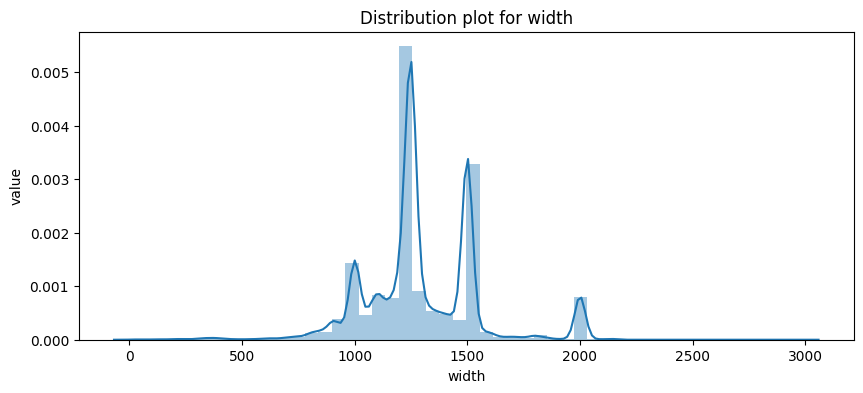

/var/folders/t9/vdv2k9890dd_ff2_c6knb2l40000gp/T/ipykernel_689/3058029955.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d_cm[col])


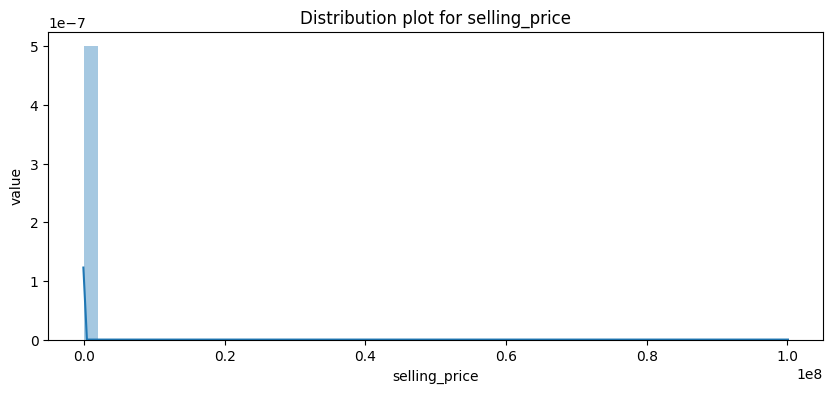

In [17]:
# plot for each numerical clmn to differentiate outliers

for col in dist_plot_clmn:
    plt.figure(figsize=(10,4))
    sns.distplot(d_cm[col])
    plt.xlabel(col)
    plt.ylabel('value')
    plt.title(f'Distribution plot for {col}')
    plt.show()

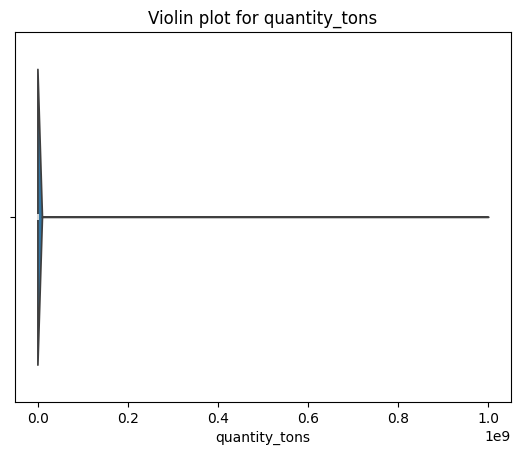

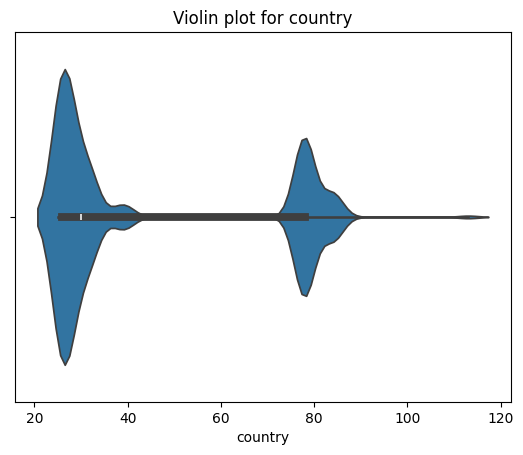

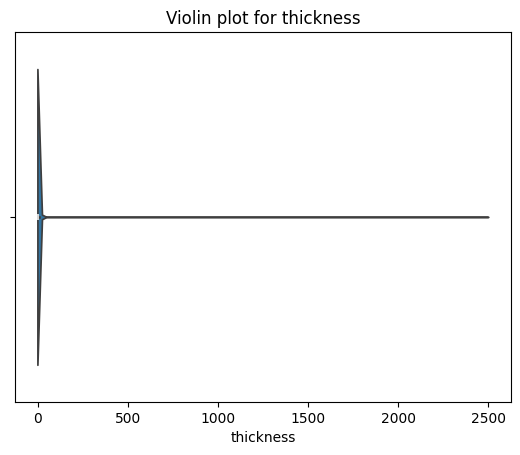

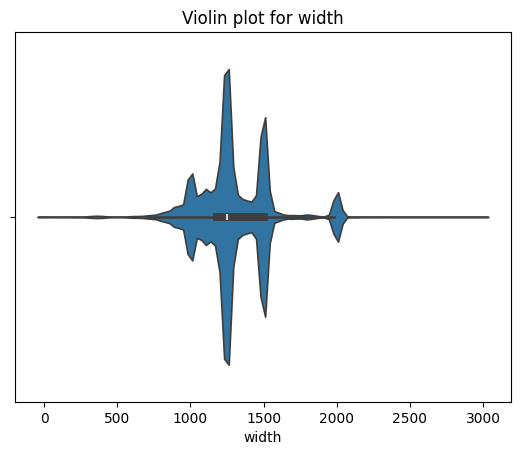

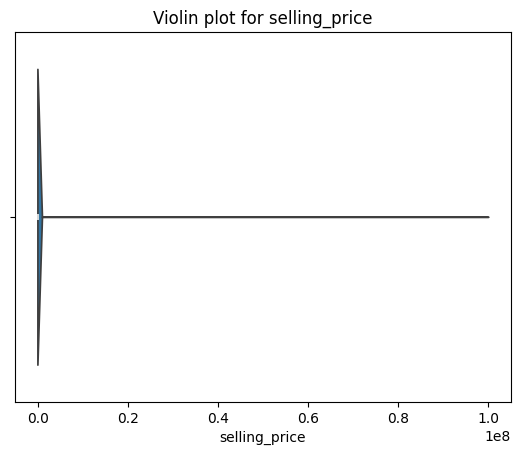

In [ ]:
# Violin plot

for col1 in dist_plot_clmn:
    sns.violinplot(x = d_cm[col1])
    plt.xlabel(col1)
    plt.title(f'Violin plot for {col1}')
    plt.show()

In [ ]:
# treating outliers for particular columns

a = d_cm['selling_price'] <= 0
print(a.sum())
d_cm.loc[a, 'selling_price']  = np.nan


a = d_cm['quantity_tons'] <= 0
print(a.sum())
d_cm.loc[a, 'quantity_tons'] = np.nan

a = d_cm['thickness'] <= 0
print(a.sum())

7
9
0


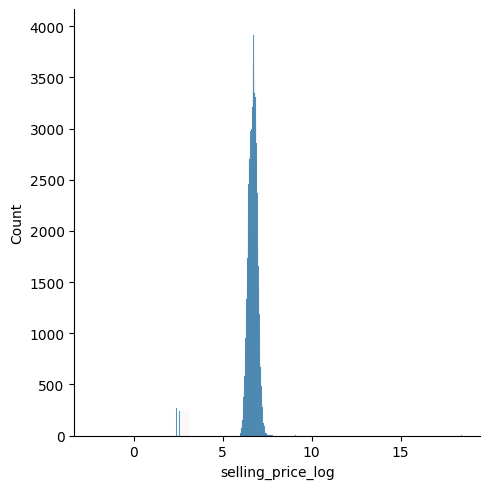

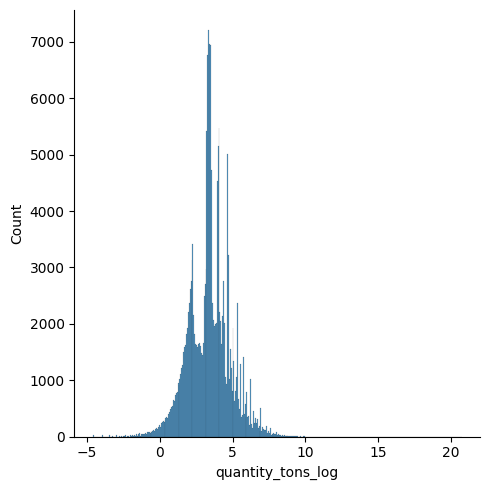

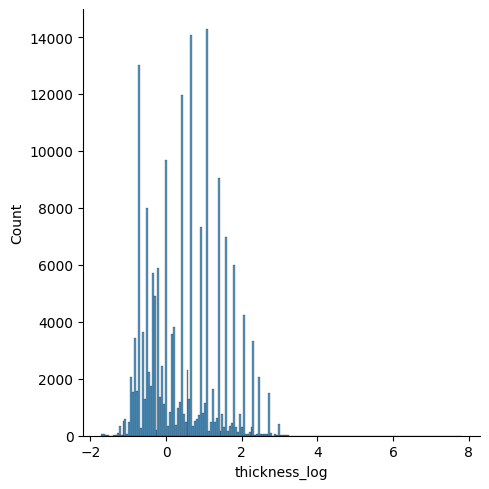

In [ ]:
# Logarithmic Transformation

d_cm['selling_price_log'] = np.log(d_cm['selling_price'])
sns.displot(d_cm['selling_price_log'])
plt.show()

d_cm['quantity_tons_log'] = np.log(d_cm['quantity_tons'])
sns.displot(d_cm['quantity_tons_log'])
plt.show()

d_cm['thickness_log'] = np.log(d_cm['thickness'])
sns.displot(d_cm['thickness_log'])
plt.show()

# REGRESSION MODEL

##### Encoding - Label and One-Hot encoders

In [ ]:
# conversion of categorical data into numerical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(d_cm['status'])
d_cm['status_encoded'] = le.fit_transform(d_cm['status'])

le.fit(d_cm['item_type'])
d_cm['item_type_encoded'] = le.fit_transform(d_cm[['item_type']])

print(d_cm['status'].unique())
print(d_cm['item_type'].unique())
# d_cm['status_encoded'].head(40)

['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
d_cm.isnull().sum()

id                   0
item_date            0
quantity_tons        9
customer             0
country              0
status               0
item_type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery_date        0
selling_price        7
selling_price_log    7
quantity_tons_log    9
thickness_log        0
status_encoded       0
item_type_encoded    0
dtype: int64

In [ ]:
d_cm.dropna(inplace=True)

In [ ]:
# split data for feature (x) and target (y)

x= d_cm[['quantity_tons_log','customer','country','status_encoded','item_type_encoded',
        'application','thickness_log','width','product_ref']]

y = d_cm['selling_price_log']

In [ ]:
# encoding categorical variables - OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(x[['item_type']])

X_ohe = ohe.fit_transform(x[['item_type']]).toarray()

ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(x[['status']])
X_be = ohe2.fit_transform(x[['status']]).toarray()


In [ ]:
# independent features after encoding
x = np.concatenate((x[['quantity_tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)

# Target column
y = d_cm['selling_price_log']

In [ ]:
# applying scalar

from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
ss.fit_transform(x)

array([[ 0.41518158, -0.75771948, -0.6922364 , ...,  0.22815623,
         0.78246752,  1.66787398],
       [ 2.25206776, -0.29404254, -0.81516504, ..., -0.75338996,
        -0.32590729,  1.66495141],
       [ 1.77578874, -0.78103757, -0.61028397, ..., -1.55084723,
        -1.31197868, -0.65976181],
       ...,
       [ 1.34760451, -0.31476531, -0.81516504, ..., -0.56930104,
         0.78246752, -0.43188135],
       [-1.34907361, -0.31476531, -0.81516504, ..., -0.88123623,
        -0.17302801, -0.43188135],
       [ 1.81172022, -0.31476531, -0.81516504, ..., -0.88123623,
        -0.21124783, -0.43188135]])

In [ ]:
# train-test split

from sklearn.model_selection import train_test_split

x_test, x_train, y_test, y_train = train_test_split(
    x, y, test_size= 0.3, random_state= 42
)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(54485, 9)
(54485,)
(127130, 9)
(127130,)


## Regression Algorithms

In [ ]:
# Linear regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.08568924935171085
0.08033970748462116


In [ ]:
# RandomForest Regression

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 20,max_depth= 4, random_state= 42)
rf.fit(x_train,y_train)

print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))

0.888645075010746
0.8730376792807879


In [ ]:
# GradientBoosting Regression

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators= 10, learning_rate= 0.1, random_state= 42)
gbr.fit(x_train,y_train)

print(gbr.score(x_train,y_train))
print(gbr.score(x_test,y_test))

0.7757868412039648
0.761489668742725


In [ ]:
# Decision Tree regression

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dtr = DecisionTreeRegressor()

# hyper parameters (refer)
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

In [ ]:
#gridsearchCV
grid_search = GridSearchCV(estimator= dtr, param_grid=param_grid, cv=5)
grid_search.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10}


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

## Regression Evaluation Metrics

In [ ]:
# check metrics

from sklearn import metrics

In [ ]:
# Mean square error
metrics.mean_squared_error(y_test,y_pred)

0.034741580461812575

In [ ]:
# Mean absolute error
metrics.mean_absolute_error(y_test,y_pred)

0.1325364061102345

In [ ]:
# R squared
metrics.r2_score(y_test,y_pred)

0.8893813888885719

## Pickling

In [ ]:
# Predicting Selling Price

new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = ss.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

In [ ]:
# Saving the model

import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(ss, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

# CLASSIFICATION

In [ ]:
# x and y split

x = d_cm[['quantity_tons_log','customer','country','selling_price_log','item_type_encoded',
        'application','thickness_log','width','product_ref']]

y = d_cm['status_encoded']

In [ ]:
copper_data.status.value_counts()

status
Won                116004
Lost                34431
Not lost for AM     19568
Revised              4276
To be approved       4167
Draft                3121
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [ ]:
# copy of original dataset

dfc = copper_data.copy()

In [ ]:
# need only 'Won' and 'Lost'

dfc = copper_data[copper_data['status'].isin(['Won', 'Lost'])]
len(dfc)

150435

In [ ]:
dfc.status.value_counts()

status
Won     116004
Lost     34431
Name: count, dtype: int64

## Encoding

In [ ]:

from sklearn.preprocessing import LabelBinarizer

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(x[['item_type']])
X_ohe = ohe.fit_transform(x[['item_type']]).toarray()

be = LabelBinarizer()
be.fit(y) 
y = be.fit_transform(y)

In [51]:
#use ordinal encoder to convert categorical data into numerical data

from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()

dfc.status = OE.fit_transform(dfc[['status']])
dfc['item_type'] = OE.fit_transform(dfc[['item_type']])

<ipython-input-51-7fc397170587>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc.status = OE.fit_transform(dfc[['status']])
<ipython-input-51-7fc397170587>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['item_type'] = OE.fit_transform(dfc[['item_type']])


In [52]:
#split data into X, Y

X = dfc[['quantity_tons','selling_price','item_type','application','thickness','width','country','customer','product_ref']]
Y = dfc['status']

In [53]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
ss.fit_transform(X)

array([[-0.09139698,  0.09705592,  0.76978981, ..., -0.71017265,
        -0.72507203,  1.6673573 ],
       [ 1.52754671,  0.76054292,  0.76978981, ..., -0.83268141,
        -0.2835426 ,  1.66443363],
       [ 0.66148089, -0.62373848,  1.72295071, ..., -0.62850015,
        -0.74727633, -0.66115687],
       ...,
       [-0.20458492, -0.71081685,  0.76978981, ..., -0.83268141,
        -0.30327554, -0.43319041],
       [-4.74988265, -0.77269647,  0.76978981, ..., -0.83268141,
        -0.30327554, -0.43319041],
       [ 0.7081077 , -0.75206993,  0.76978981, ..., -0.83268141,
        -0.30327554, -0.43319041]])

In [54]:
# train-test split

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(
    X,Y,test_size=0.3, random_state=42
)

In [55]:
print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)

(45131, 9)
(105304, 9)
(45131,)
(105304,)


## Classification Algorithms

In [56]:
# Decision tree classifer

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 5, random_state = 1)

dtc.fit(X_train, Y_train)

print(dtc.score(X_train, Y_train))
print(dtc.score(X_test, Y_test))


0.8173193800805287
0.8141632137555117


In [ ]:
# Predict the status for a new sample

new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = ss.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

In [ ]:
# Saving the model

import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(ss, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)

In [57]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,Y_train)

print(knn.score(X_train, Y_train))
print(knn.score(X_test, Y_test))

0.9232127934361468
0.8873058429904057


In [58]:
# Random forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators= 20, max_depth=6, random_state=35)

rfc.fit(X_train,Y_train)

print(rfc.score(X_train, Y_train))
print(rfc.score(X_test, Y_test))

0.8241757198207096
0.8191930158870843


In [59]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=30, learning_rate=0.1, random_state=28)

gbc.fit(X_train,Y_train)

print(gbc.score(X_train, Y_train))
print(gbc.score(X_test, Y_test))

0.8195035326293398
0.814872260752033


In [60]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

print(lr.score(X_train, Y_train))
print(lr.score(X_test, Y_test))

0.7720504444275621
0.7689614677272828


In [ ]:
# XGBClassifier

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [64]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, Y_train)
xgb_model.score(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:18:58] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.6172907664240967

In [65]:
y_predict = xgb_model.predict(X_test)
mean_squared_error(Y_test, y_predict)

0.07759954746217022

In [66]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [67]:
# ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=20, random_state=0)

clf.fit(X_train, Y_train)

print(clf.score(X_train, Y_train))
print(clf.score(X_test, Y_test))

1.0
0.9282311493208659


In [68]:
knn.predict(X_test)

array([1., 1., 1., ..., 0., 1., 1.])

In [69]:
y_pred= knn.predict(X_test)

In [70]:
# confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[ 8208,  2219],
       [ 2867, 31837]])

Text(58.222222222222214, 0.5, 'Truth')

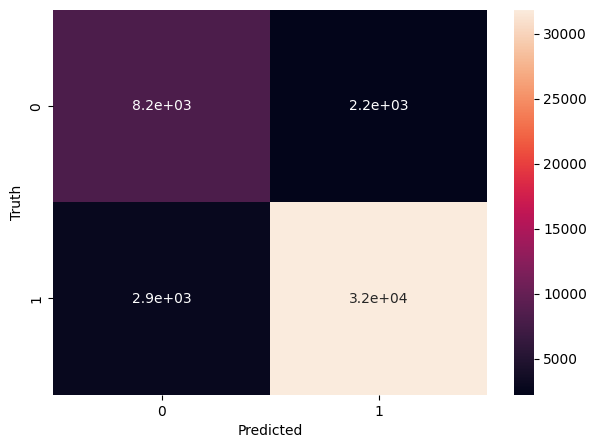

In [71]:
# draw heatmap

plt.figure(figsize = (7,5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Classfication metrics

In [76]:


from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, auc

# check accuracy score.
print("Accuracy score: " , accuracy_score(Y_test, y_pred))

# f1 score
print("f1score: " , f1_score(Y_test,y_pred, average = 'macro'))

Accuracy score:  0.8873058429904057
f1score:  0.8447482204531591


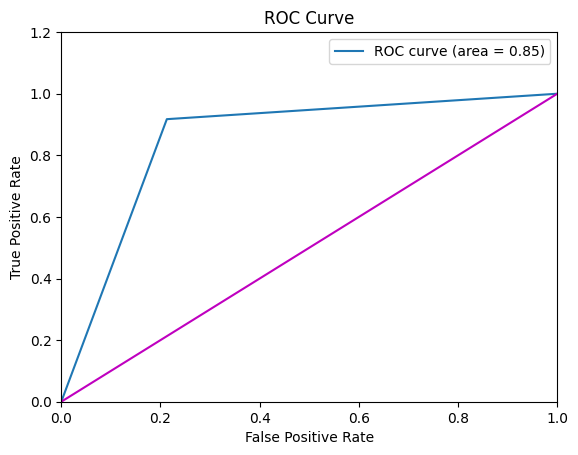

In [88]:
# ROC curve and AUC

fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'm-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [89]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.79      0.76     10427
         1.0       0.93      0.92      0.93     34704

    accuracy                           0.89     45131
   macro avg       0.84      0.85      0.84     45131
weighted avg       0.89      0.89      0.89     45131

